In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [10]:
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

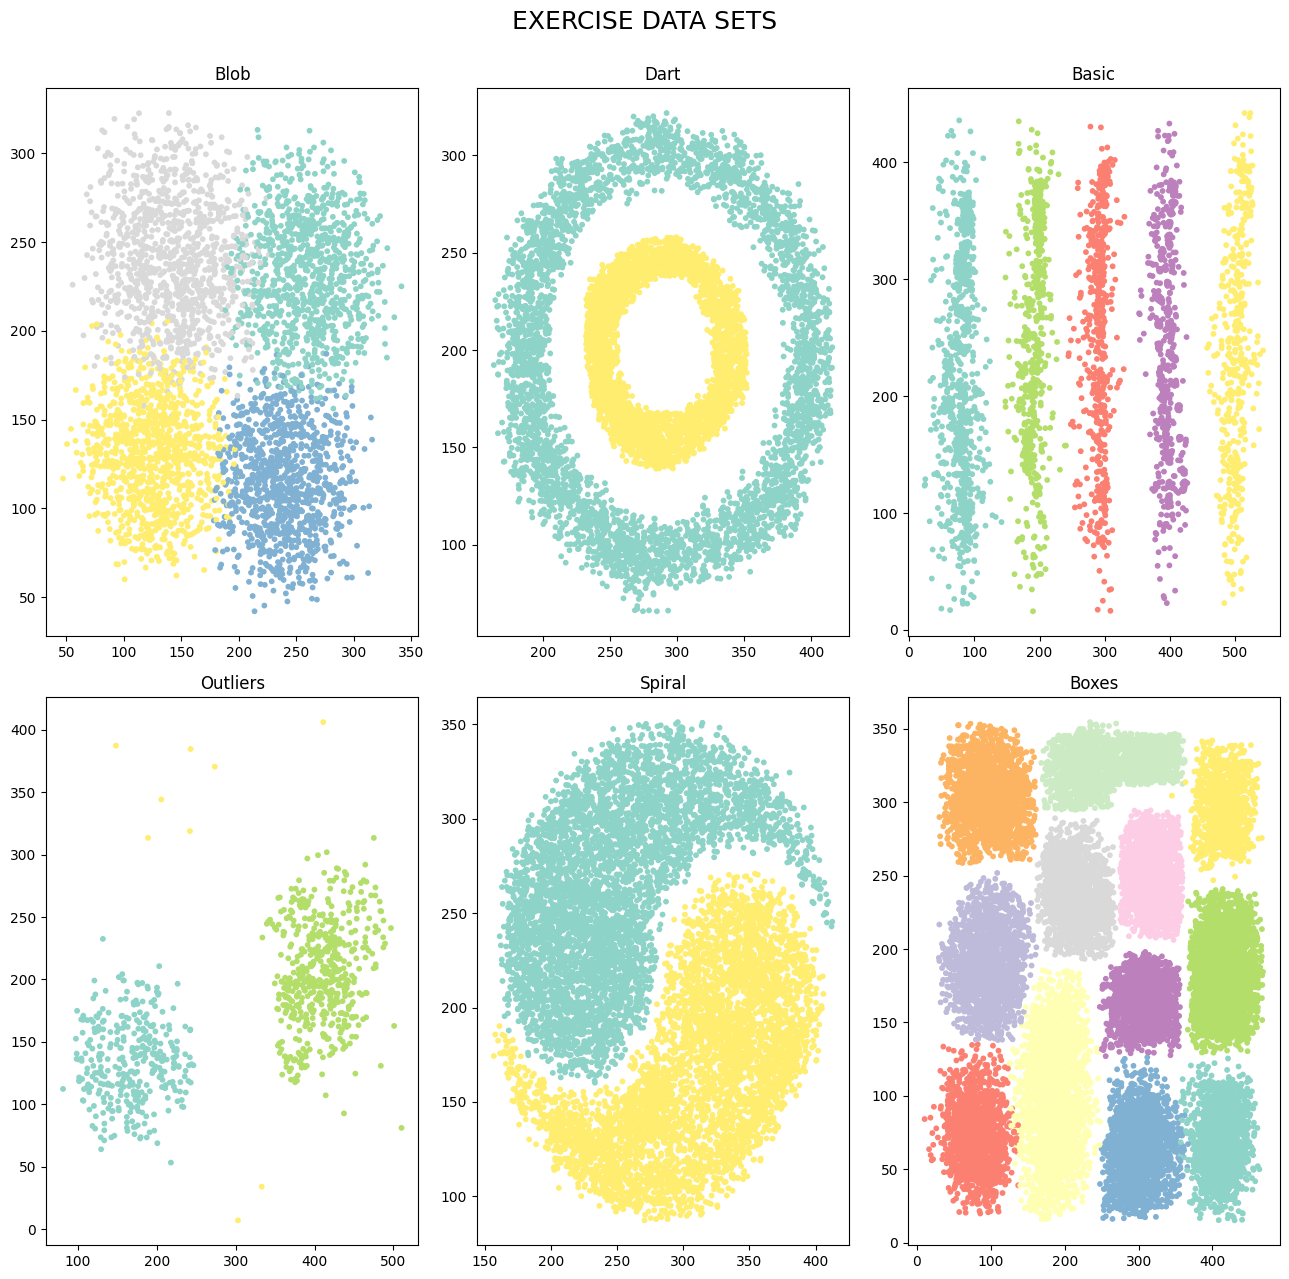

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

In [ ]:
df_blob_kmeans = blob_df.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [ ]:
df_blob_kmeans.drop(['color'], axis = 1, inplace =True)
df_dart_kmeans.drop(['color'], axis = 1, inplace =True)
df_basic_kmeans.drop(['color'], axis = 1, inplace =True)
df_outliers_kmeans.drop(['color'], axis = 1, inplace =True)
df_spiral2_kmeans.drop(['color'], axis = 1, inplace =True)
df_boxes3_kmeans.drop(['color'], axis = 1, inplace =True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_dart = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_basic = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_boxes3 = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)

y_kmeans_blob = kmeans_blob.fit_predict(df_blob_kmeans)
y_kmeans_dart = kmeans_dart.fit_predict(df_dart_kmeans)
y_kmeans_basic = kmeans_basic.fit_predict(df_basic_kmeans)
y_kmeans_outliers = kmeans_outliers.fit_predict(df_outliers_kmeans)
y_kmeans_spiral2 = kmeans_spiral2.fit_predict(df_spiral2_kmeans)
y_kmeans_boxes3 = kmeans_boxes3.fit_predict(df_boxes3_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df_blob_kmeans['Cluster'] = y_kmeans_blob
df_dart_kmeans['Cluster'] = y_kmeans_dart
df_basic_kmeans['Cluster'] = y_kmeans_basic
df_outliers_kmeans['Cluster'] = y_kmeans_outliers
df_spiral2_kmeans['Cluster'] = y_kmeans_spiral2
df_boxes3_kmeans['Cluster'] = y_kmeans_boxes3

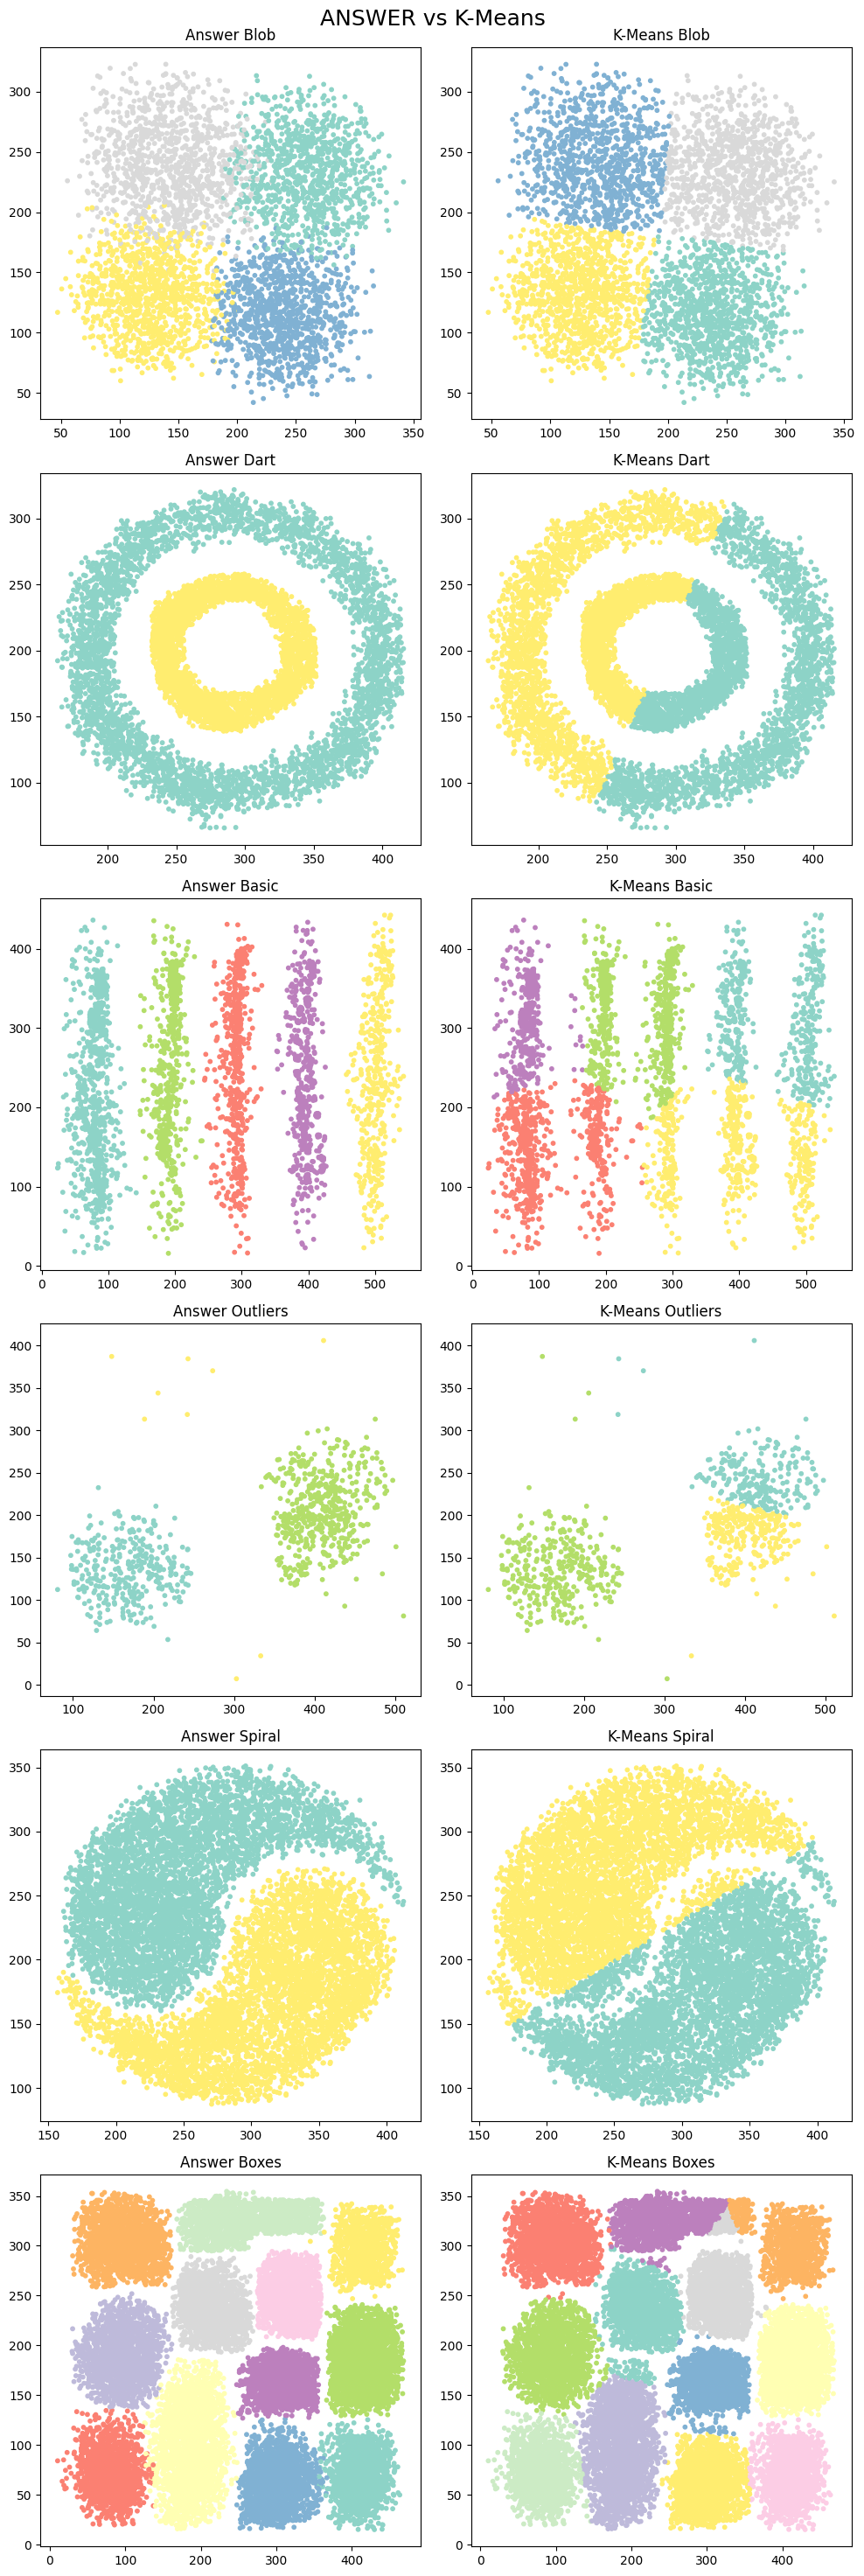

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Boxes");

plt.tight_layout()

In [ ]:
# @title K-Medoids

In [ ]:
df_blob_kmedoids = blob_df.copy()
df_dart_kmedoids = dart_df.copy()
df_basic_kmedoids = basic2_df.copy()
df_outliers_kmedoids = outliers_df.copy()
df_spiral2_kmedoids = spiral2_df.copy()
df_boxes3_kmedoids = boxes3_df.copy()

In [ ]:
df_blob_kmedoids.drop(['color'], axis = 1, inplace =True)
df_dart_kmedoids.drop(['color'], axis = 1, inplace =True)
df_basic_kmedoids.drop(['color'], axis = 1, inplace =True)
df_outliers_kmedoids.drop(['color'], axis = 1, inplace =True)
df_spiral2_kmedoids.drop(['color'], axis = 1, inplace =True)
df_boxes3_kmedoids.drop(['color'], axis = 1, inplace =True)

In [ ]:
pip install -q scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=8, method='pam', metric='euclidean', random_state=42)
# y_KMedoids = KMedoids.fit_predict(df_kmedoids)

kmedoids_blob = KMedoids(n_clusters = 4, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)
kmedoids_dart = KMedoids(n_clusters = 2, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)
kmedoids_basic = KMedoids(n_clusters = 5, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)
kmedoids_outliers = KMedoids(n_clusters = 3, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)
kmedoids_spiral2 = KMedoids(n_clusters = 2, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)
kmedoids_boxes3 = KMedoids(n_clusters = 12, method='pam', metric='euclidean',init = 'k-medoids++', random_state = 42)

y_kmedoids_blob = kmedoids_blob.fit_predict(df_blob_kmedoids)
y_kmedoids_dart = kmedoids_dart.fit_predict(df_dart_kmedoids)
y_kmedoids_basic = kmedoids_basic.fit_predict(df_basic_kmedoids)
y_kmedoids_outliers = kmedoids_outliers.fit_predict(df_outliers_kmedoids)
y_kmedoids_spiral2 = kmedoids_spiral2.fit_predict(df_spiral2_kmedoids)
y_kmedoids_boxes3 = kmedoids_boxes3.fit_predict(df_boxes3_kmedoids)

In [ ]:
df_blob_kmedoids['Cluster'] = y_kmedoids_blob
df_dart_kmedoids['Cluster'] = y_kmedoids_dart
df_basic_kmedoids['Cluster'] = y_kmedoids_basic
df_outliers_kmedoids['Cluster'] = y_kmedoids_outliers
df_spiral2_kmedoids['Cluster'] = y_kmedoids_spiral2
df_boxes3_kmedoids['Cluster'] = y_kmedoids_boxes3

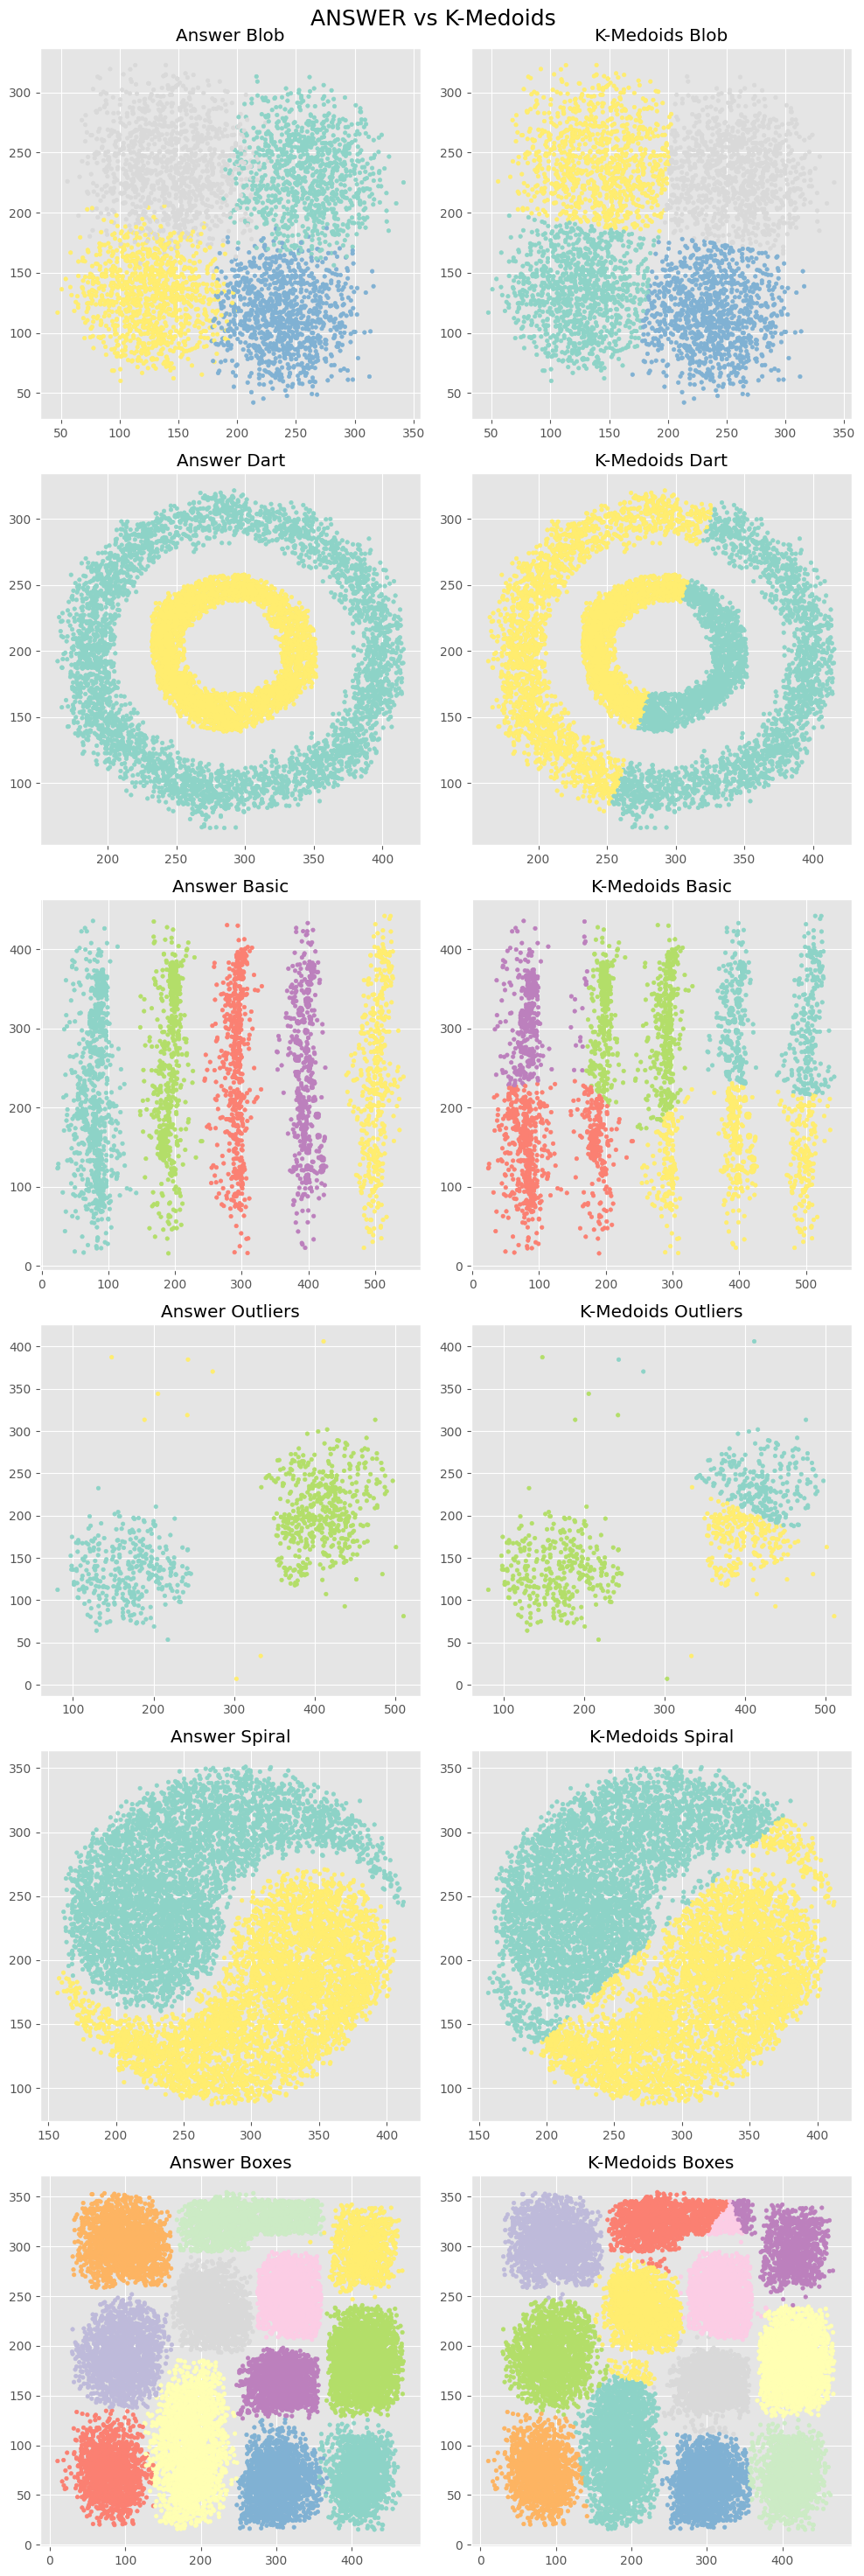

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Medoids\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmedoids['x'], df_blob_kmedoids['y'], c=df_blob_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Medoids Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmedoids['x'], df_dart_kmedoids['y'], c=df_dart_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Medoids Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmedoids['x'], df_basic_kmedoids['y'], c=df_basic_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Medoids Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmedoids['x'], df_outliers_kmedoids['y'], c=df_outliers_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Medoids Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmedoids['x'], df_spiral2_kmedoids['y'], c=df_spiral2_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Medoids Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmedoids['x'], df_boxes3_kmedoids['y'], c=df_boxes3_kmedoids['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Medoids Boxes");

plt.tight_layout()

In [ ]:
# @title BIRCH

In [ ]:
df_blob_BIRCH = blob_df.copy()
df_dart_BIRCH = dart_df.copy()
df_basic_BIRCH = basic2_df.copy()
df_outliers_BIRCH = outliers_df.copy()
df_spiral2_BIRCH = spiral2_df.copy()
df_boxes3_BIRCH = boxes3_df.copy()


In [ ]:

df_blob_BIRCH.drop(['color'], axis = 1, inplace =True)
df_dart_BIRCH.drop(['color'], axis = 1, inplace =True)
df_basic_BIRCH.drop(['color'], axis = 1, inplace =True)
df_outliers_BIRCH.drop(['color'], axis = 1, inplace =True)
df_spiral2_BIRCH.drop(['color'], axis = 1, inplace =True)
df_boxes3_BIRCH.drop(['color'], axis = 1, inplace =True)



In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=3)
birch = Birch(n_clusters = 6)
# y_BIRCH = birch.fit_predict(df_BIRCH)

BIRCH_blob = Birch(n_clusters = 4)
BIRCH_dart = Birch(n_clusters = 2)
BIRCH_basic = Birch(n_clusters = 5)
BIRCH_outliers = Birch(n_clusters = 3)
BIRCH_spiral2 = Birch(n_clusters = 2)
BIRCH_boxes3 = Birch(n_clusters = 12)


In [ ]:
y_BIRCH_blob = BIRCH_blob.fit_predict(df_blob_BIRCH)
y_BIRCH_dart = BIRCH_dart.fit_predict(df_dart_BIRCH)
y_BIRCH_basic = BIRCH_basic.fit_predict(df_basic_BIRCH)
y_BIRCH_outliers = BIRCH_outliers.fit_predict(df_outliers_BIRCH)
y_BIRCH_spiral2 = BIRCH_spiral2.fit_predict(df_spiral2_BIRCH)
y_BIRCH_boxes3 = BIRCH_boxes3.fit_predict(df_boxes3_BIRCH)


In [ ]:
df_blob_BIRCH['Cluster'] = y_BIRCH_blob
df_dart_BIRCH['Cluster'] = y_BIRCH_dart
df_basic_BIRCH['Cluster'] = y_BIRCH_basic
df_outliers_BIRCH['Cluster'] = y_BIRCH_outliers
df_spiral2_BIRCH['Cluster'] = y_BIRCH_spiral2
df_boxes3_BIRCH['Cluster'] = y_BIRCH_boxes3


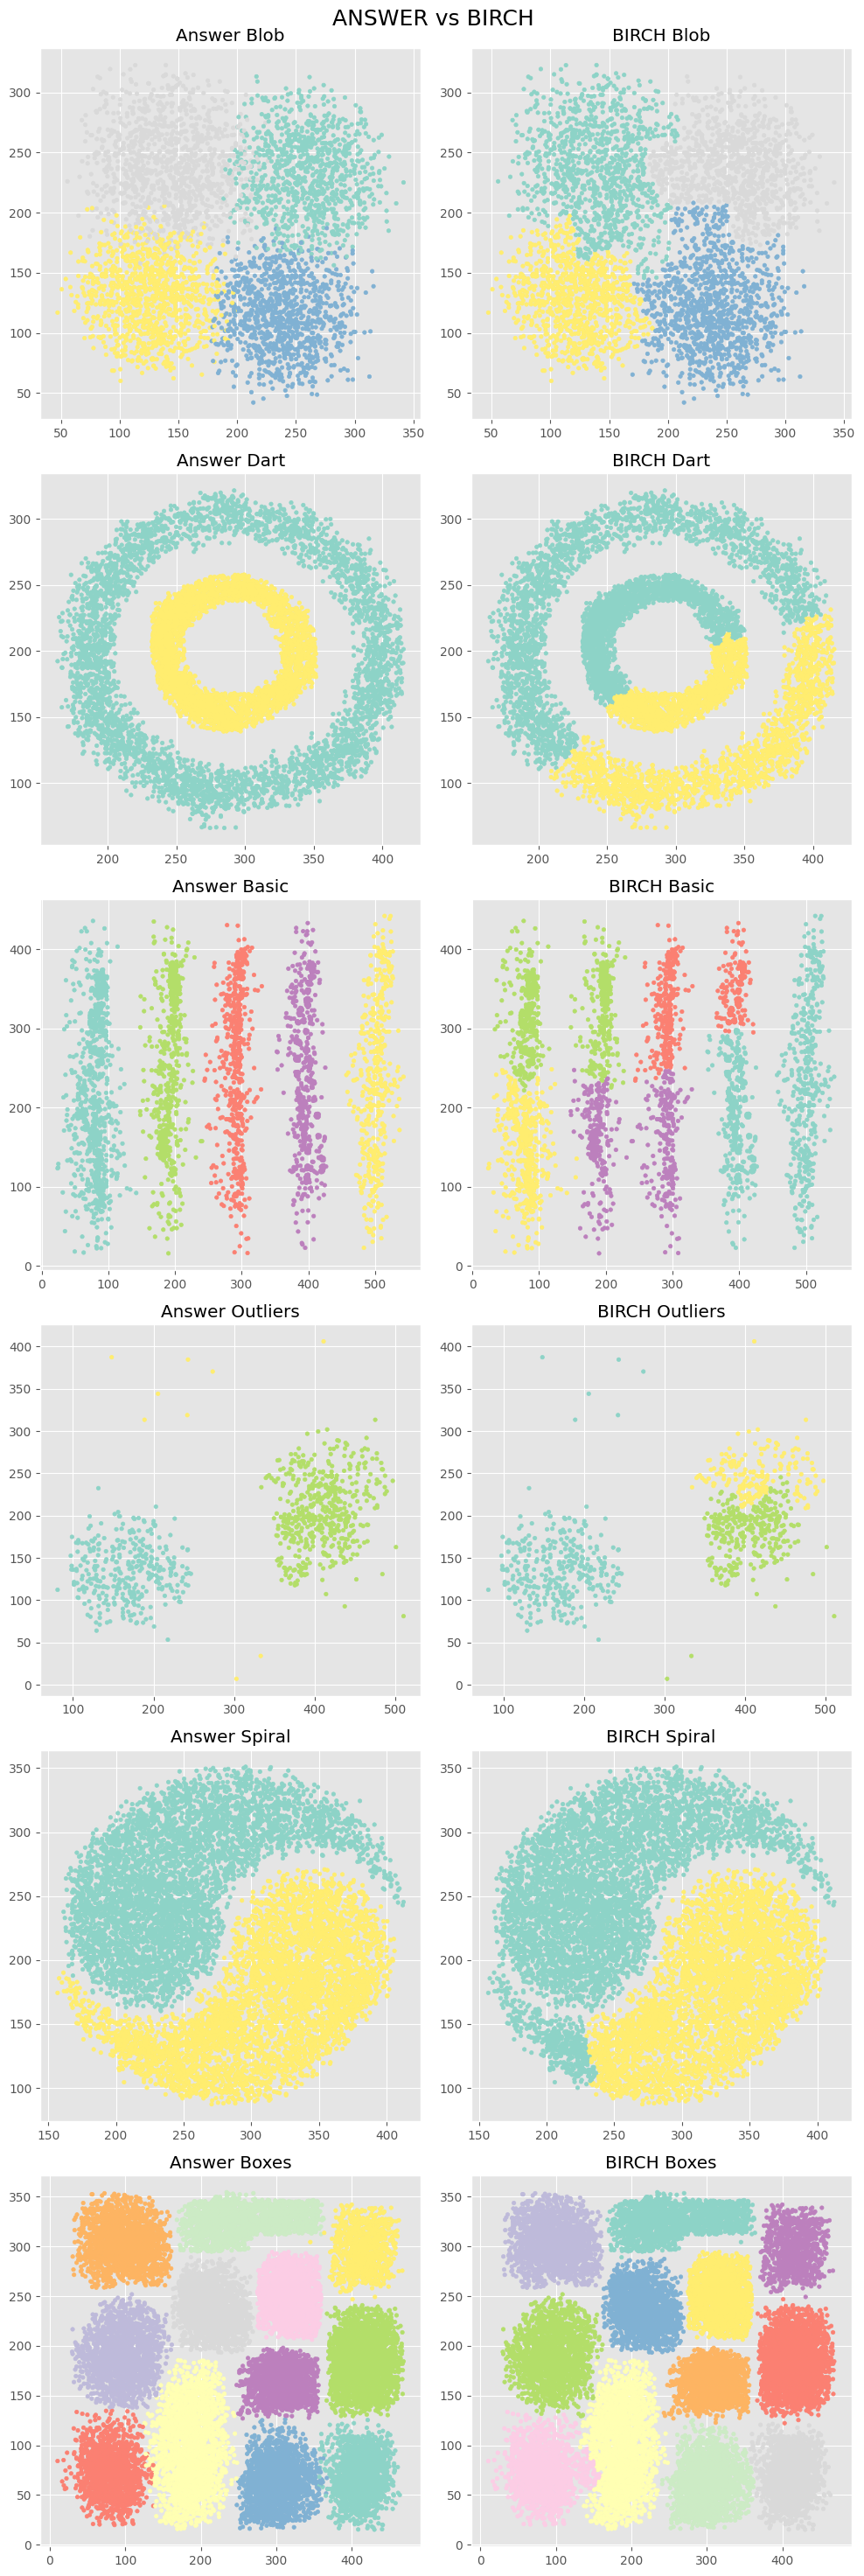

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs BIRCH\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_BIRCH['x'], df_blob_BIRCH['y'], c=df_blob_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("BIRCH Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_BIRCH['x'], df_dart_BIRCH['y'], c=df_dart_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("BIRCH Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_BIRCH['x'], df_basic_BIRCH['y'], c=df_basic_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("BIRCH Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_BIRCH['x'], df_outliers_BIRCH['y'], c=df_outliers_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("BIRCH Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_BIRCH['x'], df_spiral2_BIRCH['y'], c=df_spiral2_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("BIRCH Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_BIRCH['x'], df_boxes3_BIRCH['y'], c=df_boxes3_BIRCH['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("BIRCH Boxes");

plt.tight_layout()



In [ ]:
# @title Chameleon

In [ ]:
import requests
import tarfile

# Download and extract the file
url = "http://glaros.dtc.umn.edu/gkhome/fetch/sw/metis/metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

# The remaining steps as you have shown in the question, with updated path
!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so

!pip install -q clustviz metis metis-python
import metispy as metis

/content/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX comp

In [ ]:
df_blob_CHAMELEON = blob_df.copy()
df_dart_CHAMELEON = dart_df.copy()
df_basic_CHAMELEON = basic2_df.copy()
df_outliers_CHAMELEON = outliers_df.copy()
df_spiral2_CHAMELEON = spiral2_df.copy()
df_boxes3_CHAMELEON = boxes3_df.copy()


In [ ]:
df_blob_CHAMELEON.drop(['color'], axis = 1, inplace =True)
df_dart_CHAMELEON.drop(['color'], axis = 1, inplace =True)
df_basic_CHAMELEON.drop(['color'], axis = 1, inplace =True)
df_outliers_CHAMELEON.drop(['color'], axis = 1, inplace =True)
df_spiral2_CHAMELEON.drop(['color'], axis = 1, inplace =True)
df_boxes3_CHAMELEON.drop(['color'], axis = 1, inplace =True)


In [ ]:
from clustviz.chameleon import chameleon


y_CHAMELEON_blob,h = chameleon.cluster(df_blob_CHAMELEON, k=4, plot=False)
y_CHAMELEON_dart,h = chameleon.cluster(df_dart_CHAMELEON, k=2, plot=False)
y_CHAMELEON_basic,h = chameleon.cluster(df_basic_CHAMELEON, k=5, plot=False)
y_CHAMELEON_outliers,h = chameleon.cluster(df_outliers_CHAMELEON, k=3, plot=False)
y_CHAMELEON_spiral2,h = chameleon.cluster(df_spiral2_CHAMELEON, k=2, plot=False)
y_CHAMELEON_boxes3,h = chameleon.cluster(df_boxes3_CHAMELEON, k=12, plot=False)


  0%|          | 0/4086 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/26 [00:00<?, ?it/s]

Merging c10 and c27
score:  7.152687758341864
Merging c4 and c16
score:  4.419817318409318
Merging c10 and c13
score:  3.1222611428136475
Merging c12 and c22
score:  3.0343780919226444
Merging c3 and c10
score:  2.778959356635381
Merging c3 and c18
score:  4.330178848926777
Merging c6 and c19
score:  1.974183124833539
Merging c5 and c15
score:  1.9115417502023748
Merging c11 and c20
score:  1.8016377725175228
Merging c2 and c24
score:  1.7854808832445348
Merging c5 and c26
score:  1.7048653762441797
Merging c2 and c4
score:  1.5151450803146052
Merging c9 and c17
score:  1.3838358842028116
Merging c7 and c25
score:  1.2543242348098471
Merging c7 and c28
score:  1.3044777767398448
Merging c6 and c11
score:  1.1327844308625834
Merging c1 and c6
score:  1.042452292873673
Merging c14 and c23
score:  1.0206097228891742
Merging c3 and c9
score:  0.9704249577417071
Merging c0 and c29
score:  0.8169251917090693
Merging c0 and c7
score:  0.986262700004571
Merging c0 and c12
score:  1.39342319425

  0%|          | 0/7278 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/28 [00:00<?, ?it/s]

Merging c10 and c29
score:  2.1879002227005784
Merging c7 and c28
score:  1.7684139754690895
Merging c8 and c16
score:  1.3608960252055258
Merging c3 and c24
score:  1.2661606734676794
Merging c11 and c22
score:  1.2494066454925516
Merging c13 and c21
score:  1.0746547156759332
Merging c0 and c13
score:  1.3353727430338547
Merging c5 and c20
score:  1.0285194419463213
Merging c10 and c15
score:  0.980802322623579
Merging c1 and c25
score:  0.8902220158927062
Merging c1 and c14
score:  0.9679727842358264
Merging c3 and c11
score:  0.8454683202180386
Merging c3 and c4
score:  1.02777318059675
Merging c3 and c19
score:  0.7464032416050141
Merging c3 and c17
score:  0.9126424341237711
Merging c3 and c9
score:  0.7446010372242687
Merging c2 and c27
score:  0.6571509862051265
Merging c2 and c12
score:  0.8005038951141027
Merging c2 and c23
score:  0.8564489193746138
Merging c6 and c18
score:  0.5928618836128796
Merging c6 and c8
score:  0.5904265177978824
Merging c1 and c6
score:  0.52501464

  0%|          | 0/3192 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/25 [00:00<?, ?it/s]

Merging c13 and c21
score:  2.4974732116861817
Merging c12 and c20
score:  2.4700815531926015
Merging c15 and c25
score:  2.4057081724821283
Merging c5 and c23
score:  1.4433083266309383
Merging c5 and c12
score:  1.0292742366213197
Merging c4 and c22
score:  0.9691764996942488
Merging c5 and c26
score:  0.872427241308713
Merging c3 and c5
score:  1.200836270563302
Merging c7 and c28
score:  0.8335355459783073
Merging c7 and c11
score:  1.0001997497045512
Merging c4 and c7
score:  1.414121688155512
Merging c4 and c19
score:  7.286681310998127
Merging c4 and c8
score:  4.546243978350351
Merging c4 and c15
score:  2.5910916555158736
Merging c3 and c16
score:  0.6913483891761504
Merging c3 and c29
score:  1.1263932147751565
Merging c6 and c14
score:  0.6513999765513846
Merging c6 and c24
score:  0.664722590287851
Merging c17 and c27
score:  0.5967207659532405
Merging c1 and c18
score:  0.5899276008824376
Merging c10 and c17
score:  0.5842939795240977
Merging c2 and c10
score:  0.663696945

  0%|          | 0/876 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/27 [00:00<?, ?it/s]

Merging c25 and c28
score:  2.2518476938546717
Merging c17 and c23
score:  2.1142813108688845
Merging c12 and c19
score:  1.8582038029555854
Merging c0 and c8
score:  1.8329795414716334
Merging c14 and c22
score:  1.6901727454586843
Merging c3 and c29
score:  1.5141273019776316
Merging c7 and c25
score:  1.4583865183445752
Merging c9 and c17
score:  1.3923973402381826
Merging c5 and c9
score:  1.4199079102665886
Merging c7 and c24
score:  1.3805020901430605
Merging c7 and c13
score:  2.287897523714981
Merging c7 and c20
score:  1.281025087993415
Merging c0 and c14
score:  1.1156672220355976
Merging c21 and c26
score:  1.0831875408438019
Merging c6 and c21
score:  2.2656288421592623
Merging c6 and c18
score:  1.6098411244278699
Merging c6 and c11
score:  1.3060840364681954
Merging c10 and c16
score:  0.9907793412611713
Merging c0 and c3
score:  0.8158525128206378
Merging c1 and c27
score:  0.7687251044268296
Merging c4 and c7
score:  0.7100394203606559
Merging c5 and c10
score:  0.60527

  0%|          | 0/9325 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/28 [00:00<?, ?it/s]

Merging c3 and c26
score:  3.631507497205425
Merging c9 and c17
score:  2.7241238609579055
Merging c4 and c21
score:  2.535088319431118
Merging c13 and c23
score:  2.5148894523106824
Merging c12 and c16
score:  2.024787510758818
Merging c6 and c14
score:  2.0206244750100257
Merging c9 and c24
score:  1.8959141692809476
Merging c6 and c9
score:  2.1932553920896165
Merging c11 and c22
score:  1.58917088313349
Merging c6 and c25
score:  1.1895368631886072
Merging c2 and c28
score:  1.162215955306048
Merging c2 and c18
score:  1.2356235203956143
Merging c2 and c10
score:  1.0725516364849008
Merging c15 and c29
score:  0.9810182900868856
Merging c8 and c15
score:  1.0821065407517385
Merging c7 and c27
score:  0.9557671691405787
Merging c11 and c20
score:  0.9287336243587234
Merging c2 and c11
score:  1.2610883073362342
Merging c2 and c5
score:  0.9110742686579175
Merging c0 and c13
score:  0.8922441910752996
Merging c0 and c19
score:  0.8868347569500736
Merging c3 and c8
score:  0.741938230

  0%|          | 0/21600 [00:00<?, ?it/s]

Begin clustering...


  0%|          | 0/18 [00:00<?, ?it/s]

Merging c2 and c26
score:  7.350562561909161
Merging c1 and c25
score:  5.9044976690868705
Merging c4 and c19
score:  3.4785601418553314
Merging c2 and c9
score:  3.299694503382779
Merging c8 and c15
score:  3.0497735451156966
Merging c12 and c24
score:  2.8471364707204225
Merging c0 and c21
score:  2.78165925136322
Merging c10 and c27
score:  2.374285580340779
Merging c3 and c28
score:  2.150582111409216
Merging c6 and c22
score:  2.011933722808221
Merging c1 and c13
score:  1.9423198845434655
Merging c10 and c16
score:  1.9137821536361286
Merging c5 and c20
score:  1.8498271226039886
Merging c8 and c29
score:  1.5610598849587347
Merging c3 and c17
score:  1.2964875473367174
Merging c2 and c14
score:  1.161919767083694
Merging c1 and c5
score:  0.9629900344811991
Merging c1 and c18
score:  7.624644272327213


In [ ]:
print(df_blob_CHAMELEON)

               x           y  cluster
0     199.115034   72.641121        2
1     196.880523  247.744708        1
2      88.426271  233.962425        1
3     118.578789  264.044188        1
4     249.572490  260.896521        1
...          ...         ...      ...
4081  124.085168  168.807922        0
4082  243.835577  216.936490        1
4083  226.728155  136.945680        2
4084  225.831882   95.884561        2
4085   95.551361  182.679353        0

[4086 rows x 3 columns]


In [ ]:
# clustviz implementation returns a df with x,y and cluster, so we grab cluster and put into result df
clusterpts_blob = y_CHAMELEON_blob['cluster']
clusterpts_dart = y_CHAMELEON_dart['cluster']
clusterpts_basic = y_CHAMELEON_basic['cluster']
clusterpts_outliers = y_CHAMELEON_outliers['cluster']
clusterpts_spiral2 = y_CHAMELEON_spiral2['cluster']
clusterpts_boxes3 = y_CHAMELEON_boxes3['cluster']

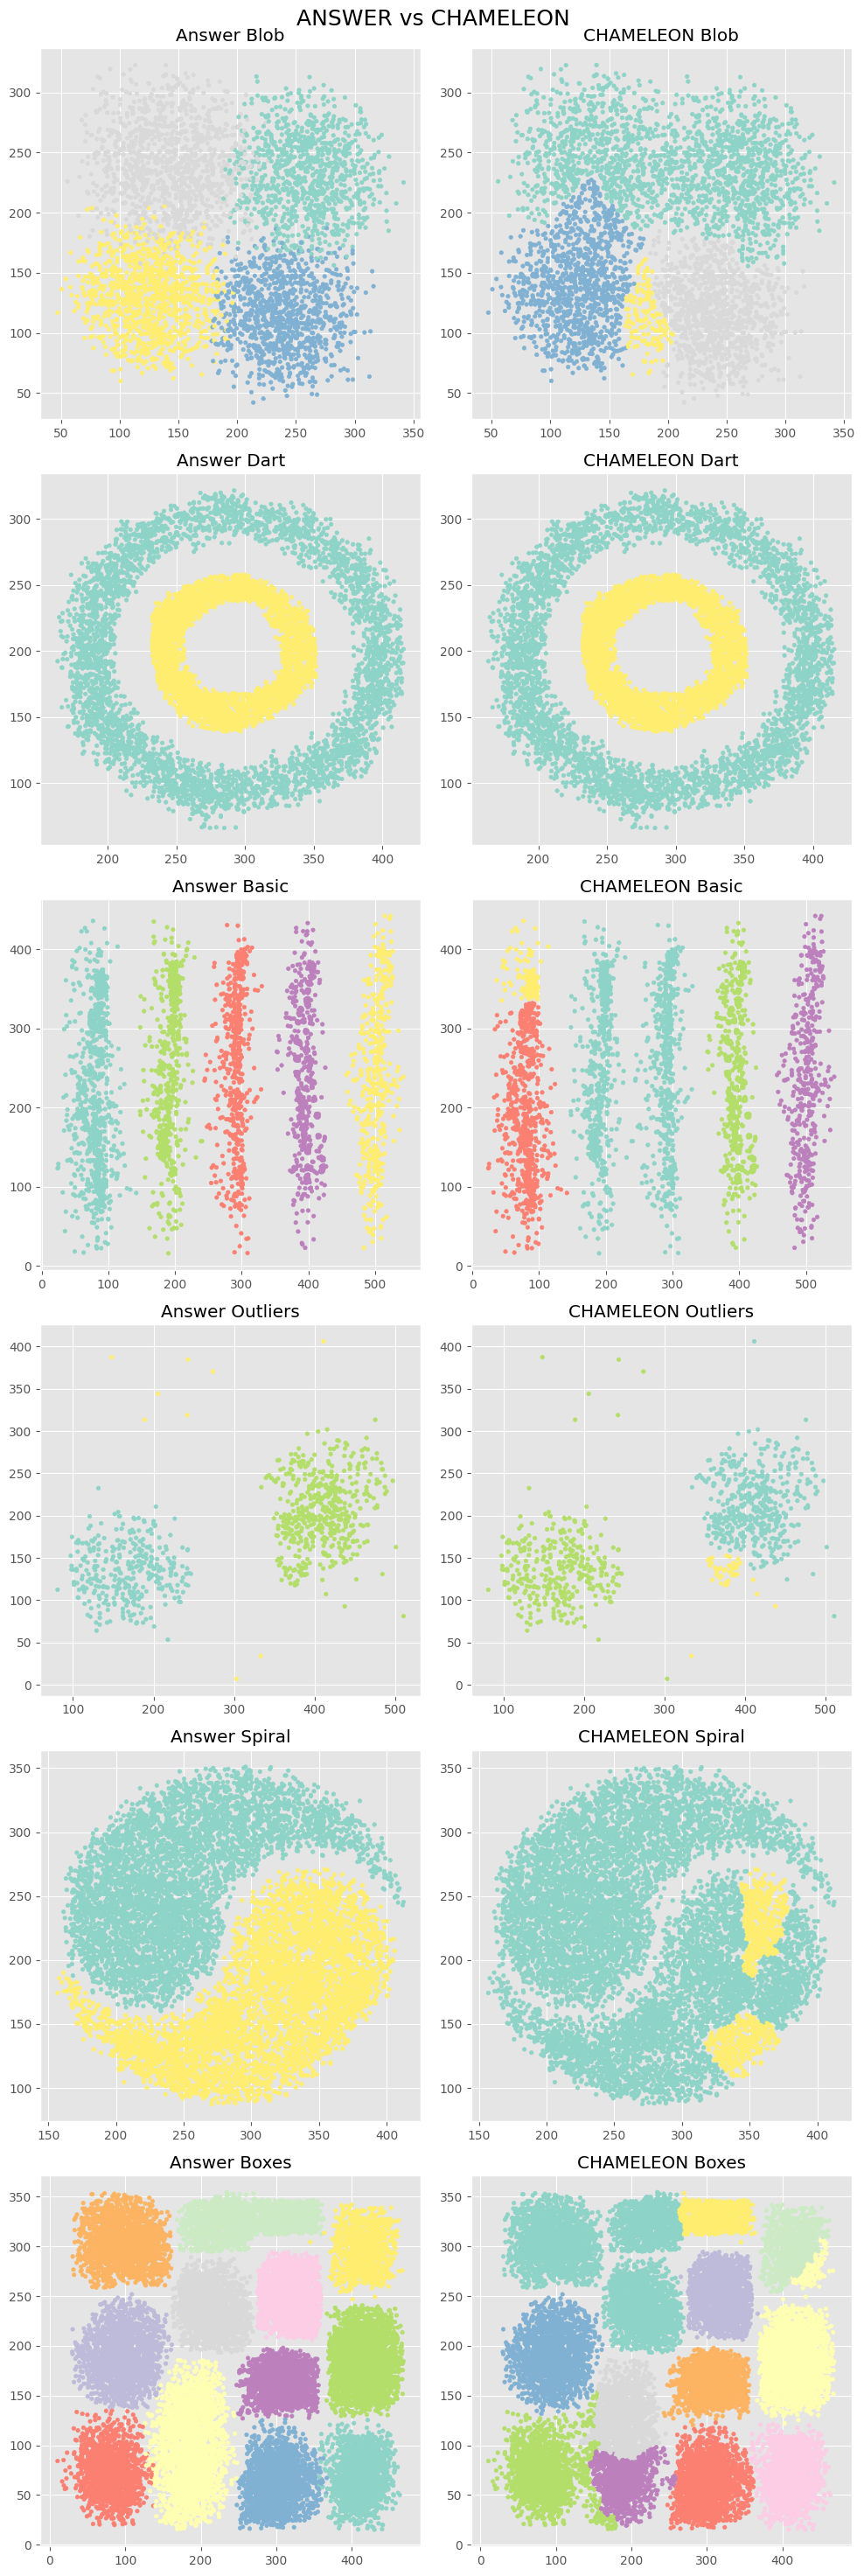

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs CHAMELEON\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_CHAMELEON['x'], df_blob_CHAMELEON['y'], c=clusterpts_blob, s=10, cmap = "Set3")
axes[0,1].set_title("CHAMELEON Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_CHAMELEON['x'], df_dart_CHAMELEON['y'], c=clusterpts_dart, s=10, cmap = "Set3")
axes[1,1].set_title("CHAMELEON Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_CHAMELEON['x'], df_basic_CHAMELEON['y'], c=clusterpts_basic, s=10, cmap = "Set3")
axes[2,1].set_title("CHAMELEON Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_CHAMELEON['x'], df_outliers_CHAMELEON['y'], c=clusterpts_outliers, s=10, cmap = "Set3")
axes[3,1].set_title("CHAMELEON Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_CHAMELEON['x'], df_spiral2_CHAMELEON['y'], c=clusterpts_spiral2, s=10, cmap = "Set3")
axes[4,1].set_title("CHAMELEON Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_CHAMELEON['x'], df_boxes3_CHAMELEON['y'], c=clusterpts_boxes3, s=10, cmap = "Set3")
axes[5,1].set_title("CHAMELEON Boxes");

plt.tight_layout()

In [ ]:
# @title DBSCAN

In [ ]:
df_blob_DBSCAN = blob_df.copy()
df_dart_DBSCAN = dart_df.copy()
df_basic_DBSCAN = basic2_df.copy()
df_outliers_DBSCAN = outliers_df.copy()
df_spiral2_DBSCAN = spiral2_df.copy()
df_boxes3_DBSCAN = boxes3_df.copy()



In [ ]:
df_blob_DBSCAN.drop(['color'], axis = 1, inplace =True)
df_dart_DBSCAN.drop(['color'], axis = 1, inplace =True)
df_basic_DBSCAN.drop(['color'], axis = 1, inplace =True)
df_outliers_DBSCAN.drop(['color'], axis = 1, inplace =True)
df_spiral2_DBSCAN.drop(['color'], axis = 1, inplace =True)
df_boxes3_DBSCAN.drop(['color'], axis = 1, inplace =True)



In [77]:
from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=0.3, min_samples=10)
# labels = dbscan.labels_

# Add the cluster labels to the dataset
# df['Cluster'] = y_DBSCAN
# y_DBSCAN = DBSCAN.fit_predict(df_DBSCAN)

hard_fit = 10
DBSCAN_blob = DBSCAN(eps= hard_fit-2, min_samples=10)
DBSCAN_dart = DBSCAN(eps= hard_fit, min_samples=2)
DBSCAN_basic = DBSCAN(eps= hard_fit, min_samples=5)
DBSCAN_outliers = DBSCAN(eps= hard_fit, min_samples=2)
DBSCAN_spiral2 = DBSCAN(eps= hard_fit+20, min_samples=2)
DBSCAN_boxes3 = DBSCAN(eps= hard_fit, min_samples=10)



In [78]:
y_DBSCAN_blob = DBSCAN_blob.fit_predict(df_blob_DBSCAN)
y_DBSCAN_dart = DBSCAN_dart.fit_predict(df_dart_DBSCAN)
y_DBSCAN_basic = DBSCAN_basic.fit_predict(df_basic_DBSCAN)
y_DBSCAN_outliers = DBSCAN_outliers.fit_predict(df_outliers_DBSCAN)
y_DBSCAN_spiral2 = DBSCAN_spiral2.fit_predict(df_spiral2_DBSCAN)
y_DBSCAN_boxes3 = DBSCAN_boxes3.fit_predict(df_boxes3_DBSCAN)


In [79]:
df_blob_DBSCAN['Cluster'] = y_DBSCAN_blob
df_dart_DBSCAN['Cluster'] = y_DBSCAN_dart
df_basic_DBSCAN['Cluster'] = y_DBSCAN_basic
df_outliers_DBSCAN['Cluster'] = y_DBSCAN_outliers
df_spiral2_DBSCAN['Cluster'] = y_DBSCAN_spiral2
df_boxes3_DBSCAN['Cluster'] = y_DBSCAN_boxes3



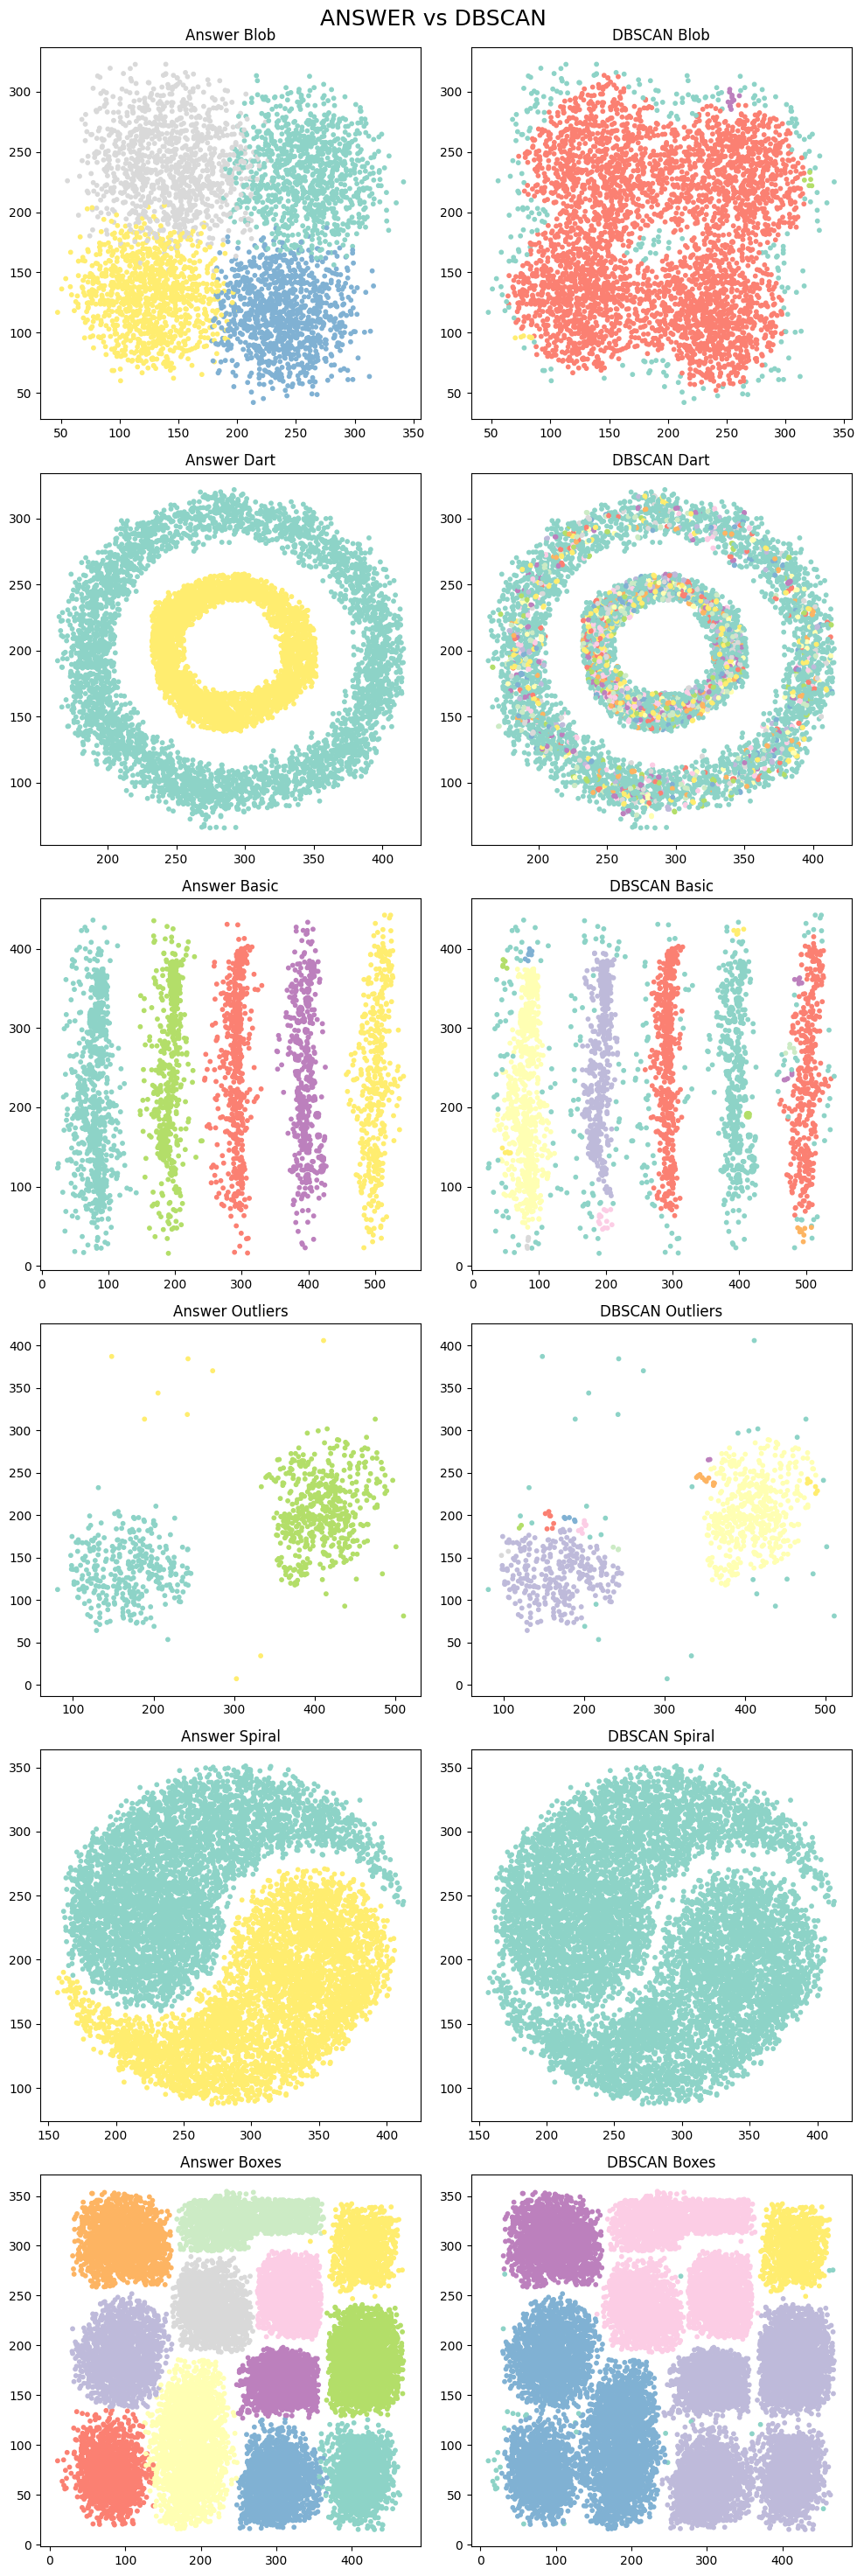

In [80]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs DBSCAN\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_DBSCAN['x'], df_blob_DBSCAN['y'], c=df_blob_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("DBSCAN Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_DBSCAN['x'], df_dart_DBSCAN['y'], c=df_dart_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("DBSCAN Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_DBSCAN['x'], df_basic_DBSCAN['y'], c=df_basic_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_DBSCAN['x'], df_outliers_DBSCAN['y'], c=df_outliers_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("DBSCAN Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_DBSCAN['x'], df_spiral2_DBSCAN['y'], c=df_spiral2_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("DBSCAN Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_DBSCAN['x'], df_boxes3_DBSCAN['y'], c=df_boxes3_DBSCAN['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("DBSCAN Boxes");

plt.tight_layout()

